# Residential property sales (2015-16)

In [9]:
import pandas
data16 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2016residential.xls')

In [10]:
data15 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2015residential.xls')

In [19]:
data = pandas.concat([data15, data16])


In [21]:
len(data['SALE_PRICE']), len(data15['SALE_PRICE']), len(data16['SALE_PRICE'])

(7790, 7069, 721)

## Statistics


In [22]:
salePrices = data['SALE_PRICE']
print('Number of properties: {2:d}\n US$ min: {3:7.0f} avrg: {0:7.0f}  median {1:7.0f} max {4:7.0f}'.format(salePrices.mean(), salePrices.median(), len(salePrices), salePrices.min(), salePrices.max()))

Number of properties: 7790
 US$ min:       1 avrg:  486687  median  385000 max 6300000


## Statistics for ZIP 80304

In [30]:
data80304 = data[data['ZIPCODE'] == 80304]
salePrices80304 = data80304['SALE_PRICE']
print('Number of properties: {2:d}\n US$ min: {3:7.0f} avrg: {0:7.0f}  median {1:7.0f} max {4:7.0f}'.format(salePrices80304.mean(), salePrices80304.median(), len(salePrices80304), salePrices80304.min(), salePrices80304.max()))

Number of properties: 678
 US$ min:    1000 avrg:  675673  median  600500 max 4495000


## Price vs date of sale (ZIP 80304) for houses between 2000 - 3000 sqft

In [177]:
%matplotlib inline
from matplotlib import pyplot
dataFiltered = data80304[2000 < data80304['ABOVE_GROUND_SQFT']]
dataFiltered = dataFiltered[dataFiltered['ABOVE_GROUND_SQFT'] < 3000]
# remove very low and high prices
dataFiltered = dataFiltered[dataFiltered['SALE_PRICE'] > 500000]
dataFiltered = dataFiltered[dataFiltered['SALE_PRICE'] < 1200000]
dates, prices = dataFiltered['SALE_DATE'], dataFiltered['SALE_PRICE']

In [178]:
print(len(prices))

77


In [179]:
import numpy
# convert to days
x = numpy.array([(d - dates.min()).days for d in dates])

In [180]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), prices)
print(regr.coef_, regr.intercept_)

[ 206.10220469] 855715.584881


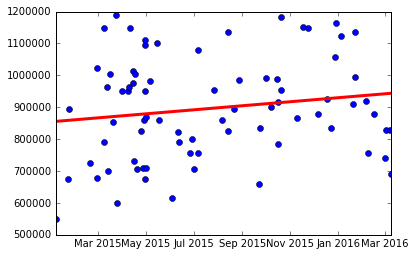

In [181]:
pyplot.plot(dates, prices,  'bo')
xLine = [dates.min(), dates.max()]
yLine = [regr.intercept_ + x.min()*regr.coef_, regr.intercept_ + x.max()*regr.coef_]
pyplot.plot(xLine, yLine, 'r-', linewidth=3)


## Price vs footage

In [182]:
footage = dataFiltered['ABOVE_GROUND_SQFT']
regr = linear_model.LinearRegression()
regr.fit(footage.reshape(-1,1), prices)
print(regr.coef_, regr.intercept_)

[ 166.80042836] 496527.331354


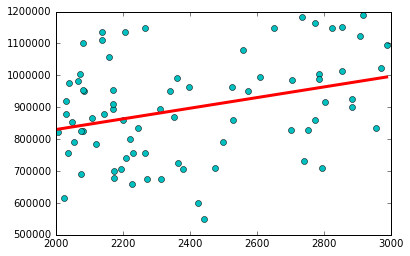

In [183]:
pyplot.plot(footage, prices,  'co')
xLine = [footage.min(), footage.max()]
yLine = [regr.intercept_ + footage.min()*regr.coef_, regr.intercept_ + footage.max()*regr.coef_]
pyplot.plot(xLine, yLine, 'r-', linewidth=3)
